# Assignment_3

## Dataset: Titanic: Machine learning from Disaster (https://www.kaggle.com/c/titanic/data)

## Dataset Description: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.In this we can analyze on what sorts of people (such as women, children, and the upper-class) were likely to survive than others on the boat. The data has in total 11 features.

In [180]:
# data analysis and wrangling
import pandas as pd
import numpy as np

In [181]:
train = pd.read_csv("titanic.csv")

In [182]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [183]:
# preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Pre-Processing

In [184]:
del train ['PassengerId']
del train ['Cabin']
del train ['Ticket']
del train ['Name']

In [185]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [186]:
train['Embarked'].fillna(train['Embarked'].mode(),inplace =True)
train['Age'].fillna(round(train['Age'].mean(),0),inplace =True)

In [187]:
data = pd.get_dummies(train)

In [188]:
from sklearn.model_selection import train_test_split
Y = data['Survived']
X = data.drop(['Survived'], axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.67)

In [189]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
64,1,30.0,0,0,27.7208,0,1,1,0,0
474,3,22.0,0,0,9.8375,1,0,0,0,1
53,2,29.0,1,0,26.0000,1,0,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1
240,3,30.0,1,0,14.4542,1,0,1,0,0


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## For max_depth 1

In [191]:
# Checking accuracy and AUC for max_depth =1 on training data.
clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth 1 is",accuracy)

Accuracy for depth 1 is 0.793624161074


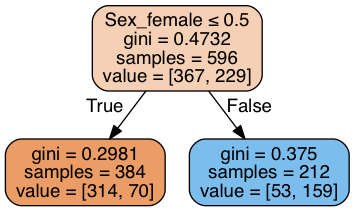

In [192]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [193]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 1 is",auc)

Area Under the curve for depth 1 is 0.774954487584


## For max_depth 2

In [194]:
# Checking accuracy and AUC for max_depth =2 on training data.

clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth2 is",accuracy)


Accuracy for depth2 is 0.802013422819


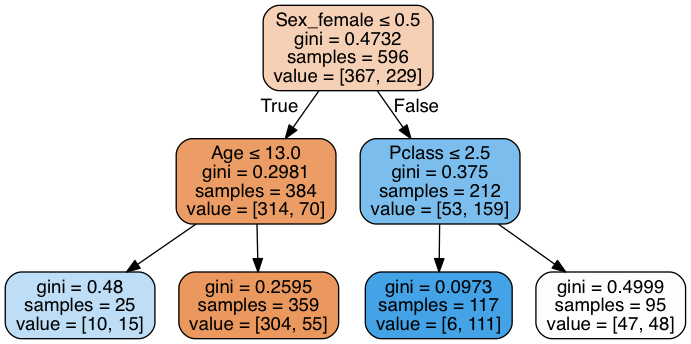

In [195]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [196]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 2 is",auc)

Area Under the curve for depth 2 is 0.794081601085


## For max_depth 3

In [197]:
# Checking accuracy and AUC for max_depth =3 on training data.

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth 3 is",accuracy)


Accuracy for depth 3 is 0.842281879195


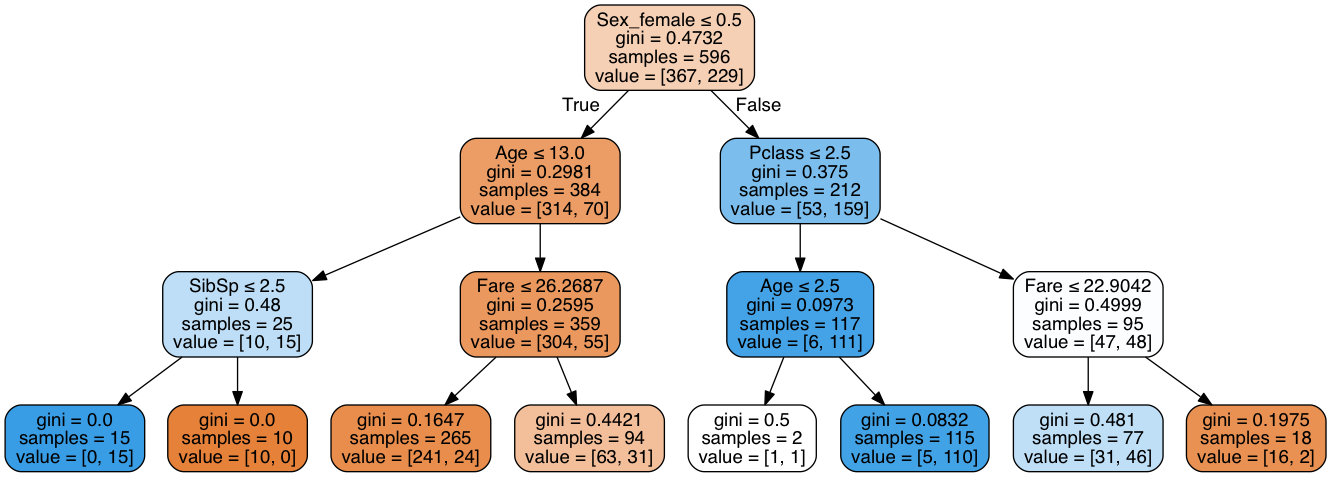

In [198]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [199]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 3 is",auc)

Area Under the curve for depth 3 is 0.824316123889


## For max_depth 4

In [200]:
# Checking accuracy and AUC for max_depth =4 on training data.

clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth 4 is",accuracy)



Accuracy for depth 4 is 0.854026845638


In [201]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 4 is",auc)

Area Under the curve for depth 4 is 0.84124198327


## For max_depth 5

In [202]:
# Checking accuracy and AUC for max_depth =5 on training data.

clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth 5 is",accuracy)



Accuracy for depth 5 is 0.862416107383


In [203]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 5 is",auc)

Area Under the curve for depth 5 is 0.82588674845


## For max_depth 6

In [204]:
# Checking accuracy and AUC for max_depth =6 on training data.

clf = DecisionTreeClassifier(max_depth = 6)
clf.fit(X_train,Y_train)
train_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train,train_pred)
print("Accuracy for depth 3 is",accuracy)


Accuracy for depth 3 is 0.884228187919


In [205]:
auc = roc_auc_score(Y_train,train_pred)
print("Area Under the curve for depth 6 is",auc)

Area Under the curve for depth 6 is 0.855913044513


##  TEST

## For max_depth 1

In [220]:
# Checking accuracy and AUC for max_depth =1 on testing data.

clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth1  is",accuracy)

Testing accuracy for depth1  is 0.772881355932


In [221]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 1 is",auc)

Area Under the curve for depth 1 is 0.750510551396


## For max_depth 2

In [222]:
# Checking accuracy and AUC for max_depth =2 on testing data.

clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth2  is",accuracy)

Testing accuracy for depth2  is 0.772881355932


In [223]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 2 is",auc)

Area Under the curve for depth 2 is 0.760575707478


## For max_depth 3

In [224]:
# Checking accuracy and AUC for max_depth =3 on testing data.

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth 3 is",accuracy)

Testing accuracy for depth 3 is 0.806779661017


In [225]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 3 is",auc)

Area Under the curve for depth 3 is 0.783015656909


## For max_depth 4

In [226]:
# Checking accuracy and AUC for max_depth =4 on testing data.

clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth 4 is",accuracy)

Testing accuracy for depth 4 is 0.803389830508


In [227]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 4 is",auc)

Area Under the curve for depth 4 is 0.788656034231


## For max_depth 5

In [228]:
# Checking accuracy and AUC for max_depth =5 on testing data.

clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth 5 is",accuracy)

Testing accuracy for depth 5 is 0.796610169492


In [229]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 5 is",auc)

Area Under the curve for depth 5 is 0.754643586502


## For max_depth 6

In [230]:
# Checking accuracy and AUC for max_depth =6 on testing data.

clf = DecisionTreeClassifier(max_depth = 6)
clf.fit(X_train,Y_train)
test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,test_pred)
print("Testing accuracy for depth 6 is",accuracy)

Testing accuracy for depth 6 is 0.8


In [231]:
auc = roc_auc_score(Y_test,test_pred)
print("Area Under the curve for depth 6 is",auc)

Area Under the curve for depth 6 is 0.772488573374


## Result: 

### The main features as per the visualization of the decision trees are sex, age, pclass, and fare. These features make sense as during the disaster of the titanic women and children were given first priority in terms of survival. That goes the same for the upper class customers(pclass).
### In terms of the accuracy and auc, both in training and testing data, auc and accuracy is increasing as the depth of the tree is increasing. It shows that tree is learning well as we increase the depth of it.